In [1]:
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda
#import sys
#sys.path.insert(1, '../../../string/analysis/scripts')
#from gate_functions import *

In [2]:
def get_sim_list(sim_name, name_pairs, starting_conf, skip25):
    sim_l = []
    indir = f'../../state_by_state_running/targeted_MD/{sim_name}_all_heavy'
    starting_conf = f'{indir}/{starting_conf}'
    
    if skip25 not in ['skip25','TMD_only']:
        print("NO! Must be skip25 or TMD_only")
        return
    
    for name1, name2 in name_pairs:
        sim_l.append(mda.Universe(starting_conf, f'{indir}/{name1}-{name2}/{name1}-{name2}.{skip25}.xtc'))
        print(starting_conf, f'{indir}/{name1}-{name2}/{name1}-{name2}.{skip25}.xtc')
        print()
    return sim_l
    

In [3]:
names = ['OutOpen', 'OutOcc', 'Occ', 'InOcc', 'InOpen']

influx_BFRU = get_sim_list('influx_BFRU', 
                           name_pairs = [(names[0], names[1]),
                                        (names[1], names[2]),
                                        (names[2], names[3]),
                                        (names[3], names[4])],
                           starting_conf='OutOpen-OutOcc/OUT.equilib.200ns.BFRU.equilibrated.gro', 
                          skip25 = 'skip25')

print()

influx_apo = get_sim_list('influx_apo', 
                           name_pairs = [(names[0], names[1]),
                                        (names[1], names[2]),
                                        (names[2], names[3]),
                                        (names[3], names[4])],
                           starting_conf='OutOpen-OutOcc/OUT.equilib.200ns.gro', 
                          skip25 = 'skip25')

print()

efflux_BFRU = get_sim_list('efflux_BFRU', 
                           name_pairs = [(names[1], names[0]),
                                        (names[2], names[1]),
                                        (names[3], names[2]),
                                        (names[4], names[3])],
                           starting_conf='InOpen-InOcc/IN.start.BFRU.equilbrated.gro', 
                          skip25 = 'skip25')

efflux_apo = get_sim_list('efflux_apo', 
                           name_pairs = [(names[1], names[0]),
                                        (names[2], names[1]),
                                        (names[3], names[2]),
                                        (names[4], names[3])],
                           starting_conf='InOpen-InOcc/IN.start.gro', 
                          skip25 = 'skip25')

../../state_by_state_running/targeted_MD/influx_BFRU_all_heavy/OutOpen-OutOcc/OUT.equilib.200ns.BFRU.equilibrated.gro ../../state_by_state_running/targeted_MD/influx_BFRU_all_heavy/OutOpen-OutOcc/OutOpen-OutOcc.skip25.xtc

../../state_by_state_running/targeted_MD/influx_BFRU_all_heavy/OutOpen-OutOcc/OUT.equilib.200ns.BFRU.equilibrated.gro ../../state_by_state_running/targeted_MD/influx_BFRU_all_heavy/OutOcc-Occ/OutOcc-Occ.skip25.xtc

../../state_by_state_running/targeted_MD/influx_BFRU_all_heavy/OutOpen-OutOcc/OUT.equilib.200ns.BFRU.equilibrated.gro ../../state_by_state_running/targeted_MD/influx_BFRU_all_heavy/Occ-InOcc/Occ-InOcc.skip25.xtc

../../state_by_state_running/targeted_MD/influx_BFRU_all_heavy/OutOpen-OutOcc/OUT.equilib.200ns.BFRU.equilibrated.gro ../../state_by_state_running/targeted_MD/influx_BFRU_all_heavy/InOcc-InOpen/InOcc-InOpen.skip25.xtc


../../state_by_state_running/targeted_MD/influx_apo_all_heavy/OutOpen-OutOcc/OUT.equilib.200ns.gro ../../state_by_state_running/t

In [4]:
all_sims = [influx_apo, influx_BFRU, efflux_apo, efflux_BFRU]
sim_names = ['influx apo', 'influx BFRU', 'efflux apo', 'efflux BFRU']

In [52]:
import MDAnalysis.analysis.distances as d

name1 = 'resid 145'
name2 = 'resid 401'

bridge_dict1 = {}
bridge_dict2 = {}

for n in np.arange(len(all_sims)):
    sim_group = all_sims[n]
    
    bridge1_info_per_sim_group = []
    bridge2_info_per_sim_group = []
    
    for sim in sim_group:
        sel1 = sim.select_atoms(name1) #145
        sel2 = sim.select_atoms(name2) #401   #91
        sel3 = sim.select_atoms('resid 394')
        sel4 = sim.select_atoms('resid 330') #152
        bridge1 = []
        bridge2 = []
        
        for ts in sim.trajectory:
            bridge1.append(np.min(d.distance_array(sel1.positions, sel2.positions)))
            bridge2.append(np.min(d.distance_array(sel3.positions, sel4.positions)))
        bridge1 = np.array(bridge1)
        bridge2 = np.array(bridge2)
        
        bridge1 = (np.mean(bridge1), np.std(bridge1))
        bridge2 = (np.mean(bridge2), np.std(bridge2))

        bridge1_info_per_sim_group.append(bridge1)
        bridge2_info_per_sim_group.append(bridge2)

        
    bridge_dict1[sim_names[n]] = bridge1_info_per_sim_group
    bridge_dict2[sim_names[n]] = bridge2_info_per_sim_group

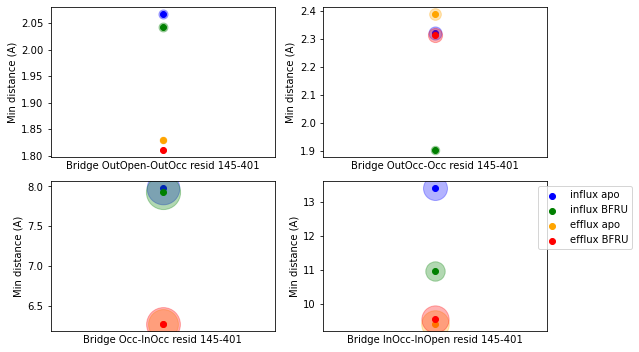

In [53]:
f, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (9,5))
color_dict = {'influx apo':'blue', 'influx BFRU':'green', 'efflux apo': 'orange', 'efflux BFRU':'red'}

axs = np.ravel(axs)

for key,values in bridge_dict1.items():
    for n, bridge_dist in enumerate(values):
        # "fill" mean
        axs[n].scatter(0.75, bridge_dist[0], s = bridge_dist[1]*300, alpha = 0.3, color = color_dict[key])
        # and normal val
        axs[n].scatter(0.75, bridge_dist[0], alpha = 1, color = color_dict[key], \
                   label = f"{key}")
leg = axs[n].legend(bbox_to_anchor = (1.4,1))


#for key,values in bridge_dict2.items():
#    for n, bridge_dist in enumerate(values):
        # "fill" mean
#        axs[n].scatter(1.25, bridge_dist[0], s = bridge_dist[1]*300, alpha = 0.3, color = color_dict[key])
        # and normal val
#        axs[n].scatter(1.25, bridge_dist[0], alpha = 0.3, color = color_dict[key], \
#                    label = f"bridge 2 for {key}")

ylim = (1, 14)

TMD_run = ['OutOpen-OutOcc', 'OutOcc-Occ', 'Occ-InOcc', 'InOcc-InOpen']

for n, ax in enumerate(axs):
    ax.set_xlim(0.5,1)
    ax.get_xaxis().set_ticks([])
    ax.set_xlabel(f'Bridge {TMD_run[n]} {name1}-{name2.split()[1]}')
    ax.set_ylabel('Min distance (A)')
    
    
plt.tight_layout()
